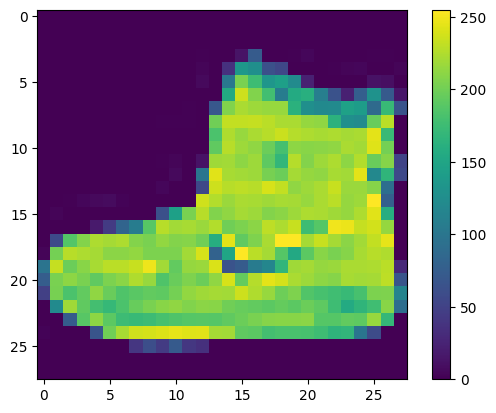

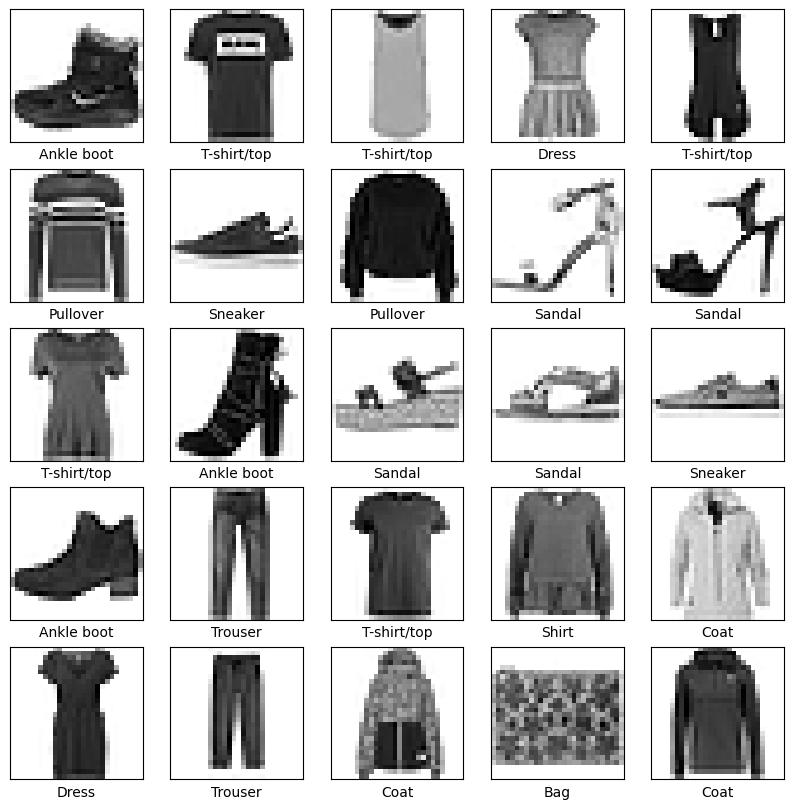

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4940 - accuracy: 0.8285
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3794 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3393 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3159 - accuracy: 0.8825
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2821 - accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2699 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2582 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2497 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

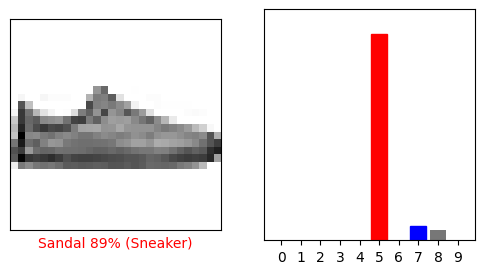

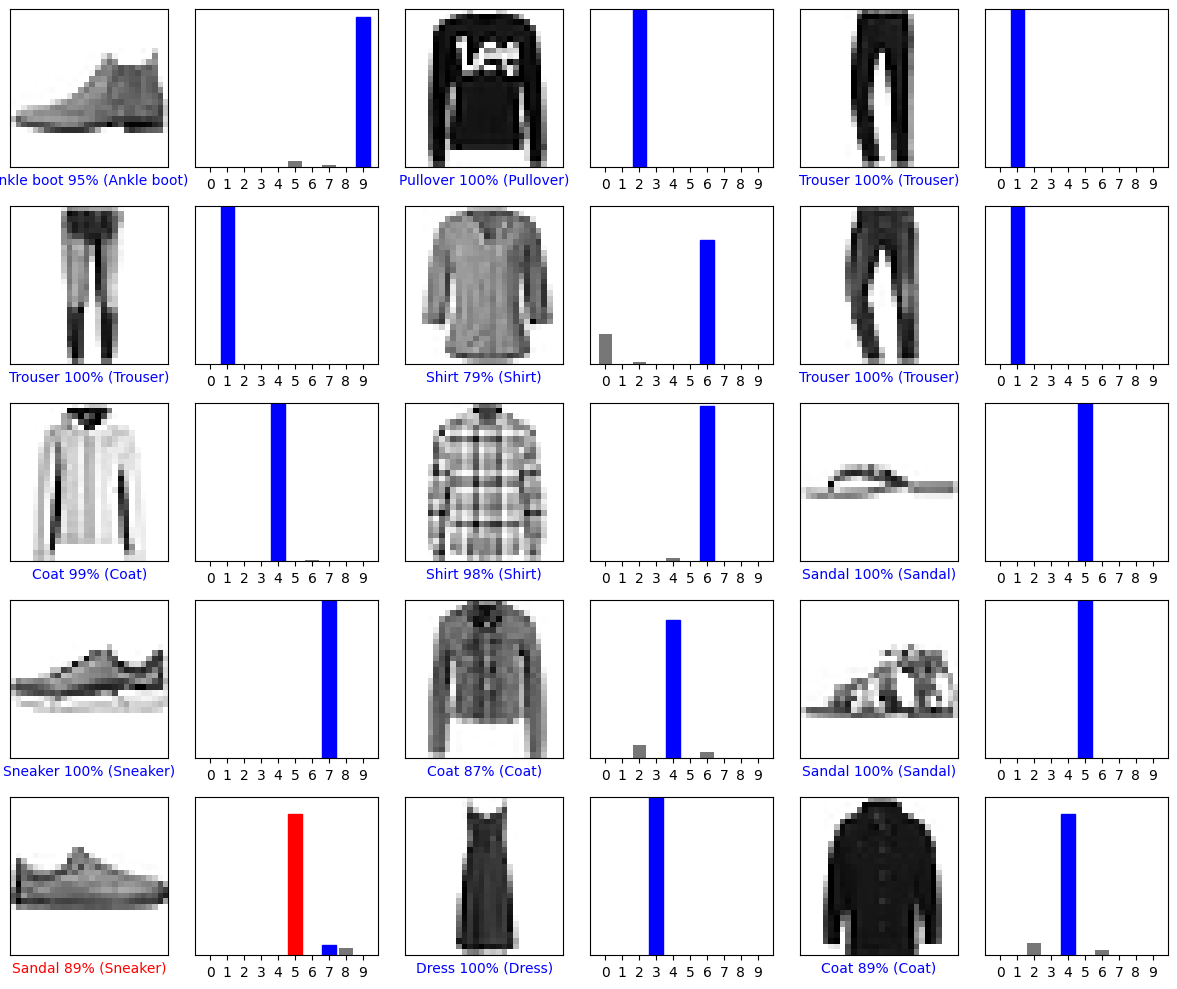

(28, 28)
1/1 [==============================] - 0s 27ms/step
[[1.9637019e-04 1.1479959e-15 9.9799371e-01 1.9932077e-11 1.6504503e-03
  2.1040253e-12 1.5958755e-04 4.8496917e-18 7.2992576e-14 4.4646006e-15]]


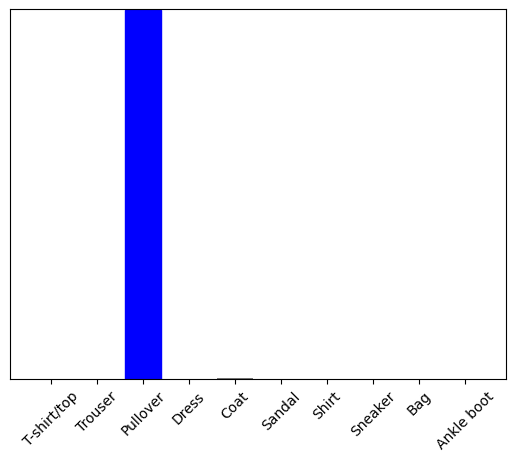

2

In [5]:
#tensorflow imports
import tensorflow as tf

#Helper imports
import numpy as np 
import matplotlib.pyplot as plt

#adding the dataset that contain image of different clothing 

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#exploring the data ...

train_images.shape # The following model have the 60000 label of data with each of pixel size 28*28 the image are the numpy array of pixels that are arrange in a manner to form a image

len(train_images) #Total images in the dataset
len(train_labels)#Total labels in the dataset

#similarly we can check the data of the test_images and test_labels on which we will test the model performance 

test_images.shape

len(test_images)
len(test_labels)

#Each pixel fall in the range of 0 to 255 to form a image

plt.figure()
plt.imshow(train_images[0])# the first image of the dataset
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#seting up the model 

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

#complie the model with optimizer and loss function to optimize and minimize the loss and accuracy 
model.compile(optimizer="adam", 
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss function 
metrics=["accuracy"])

#fitting the model to check for overfitting 
model.fit(train_images,train_labels, epochs=10)

#evaluting the model using the test images and test labels
model.evaluate(test_images, test_labels , verbose=2)

#adding a Softmax() function for prediction...
probability_model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Softmax()
])

#making a prediction using the test_images
predictions = probability_model.predict(test_images)

predictions[0]

#now we have a array of condifidence that represent the models confidence in predicting the labels of different images

np.argmax(predictions[0])

#now we will check the value from the actual test label 

test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i=12 #index of the value for which we want to make the predictions about we can change it value and it will change the value of item selected from the dataset to evalute and perform the predictions
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

#The below code will arrange the predictions for multiple values and in a row and column manner 
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Now I check for a single image from the test_labels
img=test_images[1]

print(img.shape)

img=(np.expand_dims(img,0))
#Add image to the batch where it's the only member
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1,predictions_single[0],test_labels)
_=plt.xticks(range(10),class_names,rotation=45)
plt.show()

np.argmax(predictions_single[0])



################################END OF IMAGE CLASSIFICATION #############################################################################
